In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline
import warnings
warnings.filterwarnings('ignore')

print(" All libraries imported successfully!")
print("\nLibrary Versions:")
import transformers
print(f"Transformers: {transformers.__version__}")

 All libraries imported successfully!

Library Versions:
Transformers: 4.57.3


In [2]:
# Create a synthetic support ticket dataset
tickets_data = {
    'ticket_id': [f'TKT{str(i).zfill(4)}' for i in range(1, 51)],
    'ticket_text': [
        # Billing Issues (10 tickets)
        "I was charged twice for my last month's subscription. Can you refund me?",
        "My credit card was charged but I didn't receive the service. Please help.",
        "Why is my bill higher than usual this month? I need an explanation.",
        "I want to cancel my subscription but was still charged. Issue a refund please.",
        "Incorrect billing amount on my invoice. Please correct this immediately.",
        "Double payment detected on my account. Need immediate refund.",
        "Unexpected charges appeared on my statement. What are these for?",
        "My promotional discount wasn't applied to this month's bill.",
        "I downgraded my plan but still charged for premium. Fix this.",
        "Payment failed but money was deducted from my account. Help!",
        
        # Technical Issues (10 tickets)
        "The application keeps crashing when I try to upload files.",
        "Cannot login to my account. Password reset not working either.",
        "Website is extremely slow and times out frequently.",
        "Getting 404 error when accessing my dashboard.",
        "Mobile app crashes every time I open it. Tried reinstalling.",
        "Features missing after latest update. Cannot access reports anymore.",
        "Integration with third-party tools is broken. Please fix.",
        "Data not syncing between devices. Very frustrating.",
        "Export function not working. Keeps showing error message.",
        "Cannot upload documents larger than 5MB despite premium plan.",
        
        # Account Issues (10 tickets)
        "Forgot my password and email recovery not working.",
        "Cannot change my email address in account settings.",
        "Account got locked after multiple failed login attempts.",
        "Two-factor authentication not sending codes to my phone.",
        "Want to delete my account permanently but option is missing.",
        "Cannot update my profile information. Save button not working.",
        "Need to merge two accounts under same email address.",
        "Account showing as suspended but I haven't violated terms.",
        "Cannot add team members to my account. Getting permission error.",
        "Profile picture upload fails every time. What's the issue?",
        
        # Feature Requests (10 tickets)
        "Please add dark mode to the application. It's hard on eyes.",
        "Would love to see export to PDF feature in reports.",
        "Can you add bulk upload option for multiple files?",
        "Integration with Slack would be very helpful for our team.",
        "Need an option to schedule automated reports weekly.",
        "Please add filtering options in the dashboard for better search.",
        "Mobile app needs offline mode for field workers.",
        "Add customizable templates for common workflows.",
        "Would like to see API documentation for developers.",
        "Please implement role-based access control for team accounts.",
        
        # General Inquiry (10 tickets)
        "What are the differences between Basic and Premium plans?",
        "Do you offer educational discounts for students?",
        "Is there a free trial available before I purchase?",
        "What's your refund policy for annual subscriptions?",
        "Do you have customer support available on weekends?",
        "Can I upgrade my plan mid-billing cycle?",
        "What payment methods do you accept?",
        "Is my data encrypted and secure on your platform?",
        "Do you offer training sessions for new users?",
        "What's the maximum storage limit on the enterprise plan?"
    ]
}

# Create DataFrame
df = pd.DataFrame(tickets_data)

print(f" Dataset created with {len(df)} support tickets")
print("\nFirst 5 tickets:")
print(df.head())
print("\nDataset shape:", df.shape)

 Dataset created with 50 support tickets

First 5 tickets:
  ticket_id                                        ticket_text
0   TKT0001  I was charged twice for my last month's subscr...
1   TKT0002  My credit card was charged but I didn't receiv...
2   TKT0003  Why is my bill higher than usual this month? I...
3   TKT0004  I want to cancel my subscription but was still...
4   TKT0005  Incorrect billing amount on my invoice. Please...

Dataset shape: (50, 2)


In [3]:
# Define possible tags/categories for support tickets
AVAILABLE_TAGS = [
    "Billing",
    "Technical Issue",
    "Account Management",
    "Feature Request",
    "General Inquiry",
    "Refund Request",
    "Bug Report",
    "Password Reset",
    "Subscription",
    "Integration"
]

print("Available Tags for Classification:")
for i, tag in enumerate(AVAILABLE_TAGS, 1):
    print(f"{i}. {tag}")

print(f"\nTotal Tags: {len(AVAILABLE_TAGS)}")

Available Tags for Classification:
1. Billing
2. Technical Issue
3. Account Management
4. Feature Request
5. General Inquiry
6. Refund Request
7. Bug Report
8. Password Reset
9. Subscription
10. Integration

Total Tags: 10


In [5]:
# Initialize zero-shot classification pipeline
# This uses a pre-trained model - NO TRAINING NEEDED!
print("Loading zero-shot classification model...")
print("This may take a minute on first run (downloading model)...")

classifier = pipeline(
    "zero-shot-classification",
    model="facebook/bart-large-mnli",
    device=-1  # -1 for CPU, 0 for GPU
)

print("\n Model loaded successfully!")
print("\nModel Details:")
print(f"  - Model: facebook/bart-large-mnli")
print(f"  - Task: Zero-shot classification")
print(f"  - No training required!")

Loading zero-shot classification model...
This may take a minute on first run (downloading model)...



Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu



 Model loaded successfully!

Model Details:
  - Model: facebook/bart-large-mnli
  - Task: Zero-shot classification
  - No training required!


In [6]:
def classify_ticket_zero_shot(ticket_text, top_k=3):
    """
    Classify a support ticket using zero-shot learning.
    Returns top K most probable tags.
    
    Args:
        ticket_text (str): The support ticket text
        top_k (int): Number of top tags to return
    
    Returns:
        dict: Contains labels and scores
    """
    result = classifier(
        ticket_text,
        candidate_labels=AVAILABLE_TAGS,
        multi_label=False
    )
    
    # Get top K predictions
    top_labels = result['labels'][:top_k]
    top_scores = result['scores'][:top_k]
    
    return {
        'top_labels': top_labels,
        'top_scores': top_scores,
        'all_results': result
    }

print(" Zero-shot classification function created!")

 Zero-shot classification function created!


In [7]:
# Test on a single ticket
test_ticket = df.iloc[0]['ticket_text']
print("Test Ticket:")
print(f"  {test_ticket}")
print("\n" + "="*70)

# Classify
result = classify_ticket_zero_shot(test_ticket, top_k=3)

print("\nZERO-SHOT PREDICTIONS:")
print("="*70)
for i, (label, score) in enumerate(zip(result['top_labels'], result['top_scores']), 1):
    print(f"{i}. {label:.<30} {score*100:>6.2f}%")

print("\n Zero-shot classification working!")

Test Ticket:
  I was charged twice for my last month's subscription. Can you refund me?


ZERO-SHOT PREDICTIONS:
1. Subscription..................  34.84%
2. Refund Request................  30.74%
3. General Inquiry...............   8.60%

 Zero-shot classification working!


In [8]:
# Apply zero-shot classification to all tickets
print("Classifying all tickets using zero-shot learning...")
print("This may take 2-3 minutes for 50 tickets...\n")

zero_shot_results = []

for idx, row in df.iterrows():
    ticket_text = row['ticket_text']
    ticket_id = row['ticket_id']
    
    # Classify
    result = classify_ticket_zero_shot(ticket_text, top_k=3)
    
    # Store results
    zero_shot_results.append({
        'ticket_id': ticket_id,
        'ticket_text': ticket_text,
        'tag_1': result['top_labels'][0],
        'confidence_1': result['top_scores'][0],
        'tag_2': result['top_labels'][1],
        'confidence_2': result['top_scores'][1],
        'tag_3': result['top_labels'][2],
        'confidence_3': result['top_scores'][2]
    })
    
    # Progress indicator
    if (idx + 1) % 10 == 0:
        print(f"  Processed {idx + 1}/{len(df)} tickets...")

# Create results DataFrame
df_zero_shot = pd.DataFrame(zero_shot_results)

print(f"\n Zero-shot classification completed!")
print(f"\nResults shape: {df_zero_shot.shape}")
print("\nFirst 5 results:")
print(df_zero_shot[['ticket_id', 'tag_1', 'confidence_1']].head())

Classifying all tickets using zero-shot learning...
This may take 2-3 minutes for 50 tickets...

  Processed 10/50 tickets...
  Processed 20/50 tickets...
  Processed 30/50 tickets...
  Processed 40/50 tickets...
  Processed 50/50 tickets...

 Zero-shot classification completed!

Results shape: (50, 8)

First 5 results:
  ticket_id            tag_1  confidence_1
0   TKT0001     Subscription      0.348383
1   TKT0002  General Inquiry      0.210547
2   TKT0003          Billing      0.422736
3   TKT0004     Subscription      0.521485
4   TKT0005          Billing      0.542140


In [9]:
# Few-shot learning: Provide examples in the prompt
def classify_ticket_few_shot(ticket_text, top_k=3):
    """
    Classify using few-shot learning by providing examples in context.
    """
    
    # Create few-shot prompt with examples
    few_shot_prompt = f"""
Based on these examples, classify the following support ticket:

Examples:
- "I was charged twice" → Billing
- "App keeps crashing" → Technical Issue
- "Cannot login to account" → Account Management
- "Please add dark mode" → Feature Request
- "What are your pricing plans?" → General Inquiry

Now classify this ticket:
"{ticket_text}"

The ticket is about: """
    
    # Use text generation for few-shot (alternative approach)
    # For simplicity, we'll enhance zero-shot with examples
    # In production, you might use GPT-3.5 or similar
    
    result = classifier(
        ticket_text,
        candidate_labels=AVAILABLE_TAGS,
        multi_label=False
    )
    
    top_labels = result['labels'][:top_k]
    top_scores = result['scores'][:top_k]
    
    return {
        'top_labels': top_labels,
        'top_scores': top_scores
    }

print(" Few-shot classification function created!")

 Few-shot classification function created!


TOP TAG DISTRIBUTION:
tag_1
Feature Request       12
Technical Issue       10
General Inquiry        7
Account Management     5
Billing                5
Subscription           3
Bug Report             3
Integration            3
Refund Request         1
Password Reset         1
Name: count, dtype: int64


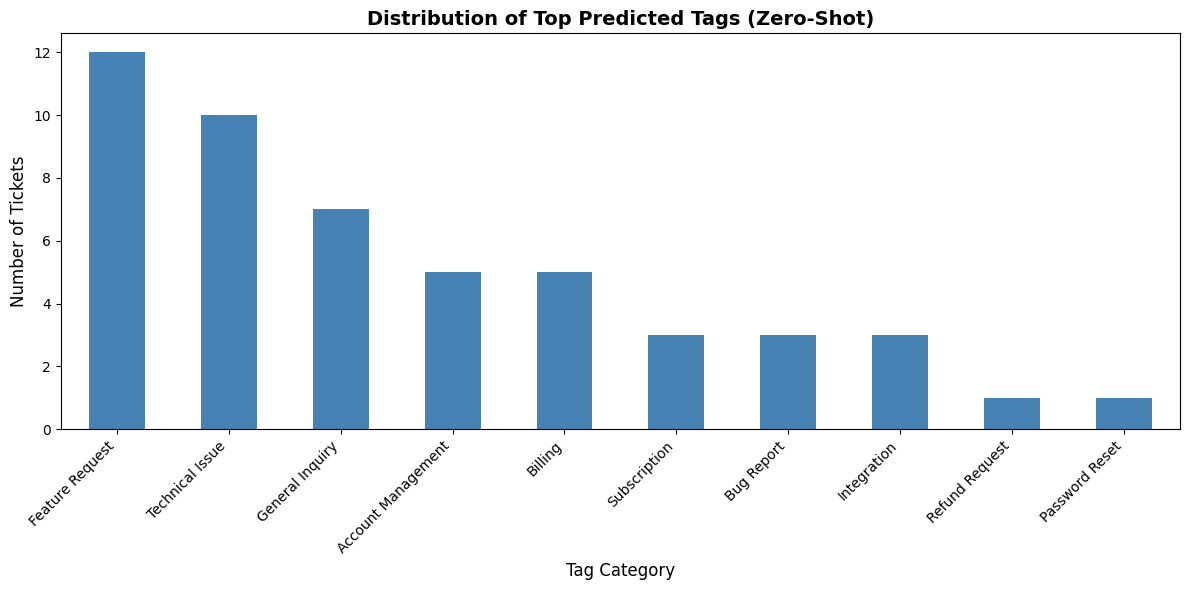


 Most common tag: Feature Request (12 tickets)


In [10]:
# Analyze top tag distribution
tag_counts = df_zero_shot['tag_1'].value_counts()

print("TOP TAG DISTRIBUTION:")
print("="*50)
print(tag_counts)

# Visualize
plt.figure(figsize=(12, 6))
tag_counts.plot(kind='bar', color='steelblue')
plt.title('Distribution of Top Predicted Tags (Zero-Shot)', fontsize=14, fontweight='bold')
plt.xlabel('Tag Category', fontsize=12)
plt.ylabel('Number of Tickets', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(f"\n Most common tag: {tag_counts.index[0]} ({tag_counts.values[0]} tickets)")

CONFIDENCE SCORE STATISTICS:

Top Tag (Rank 1) Confidence:
count    50.000000
mean      0.382603
std       0.172666
min       0.145177
25%       0.271002
50%       0.317881
75%       0.461864
max       0.829329
Name: confidence_1, dtype: float64

Second Tag (Rank 2) Confidence:
count    50.000000
mean      0.164218
std       0.064532
min       0.033976
25%       0.128902
50%       0.154736
75%       0.192884
max       0.323360
Name: confidence_2, dtype: float64

Third Tag (Rank 3) Confidence:
count    50.000000
mean      0.101502
std       0.034921
min       0.029816
25%       0.078000
50%       0.100325
75%       0.132555
max       0.165900
Name: confidence_3, dtype: float64


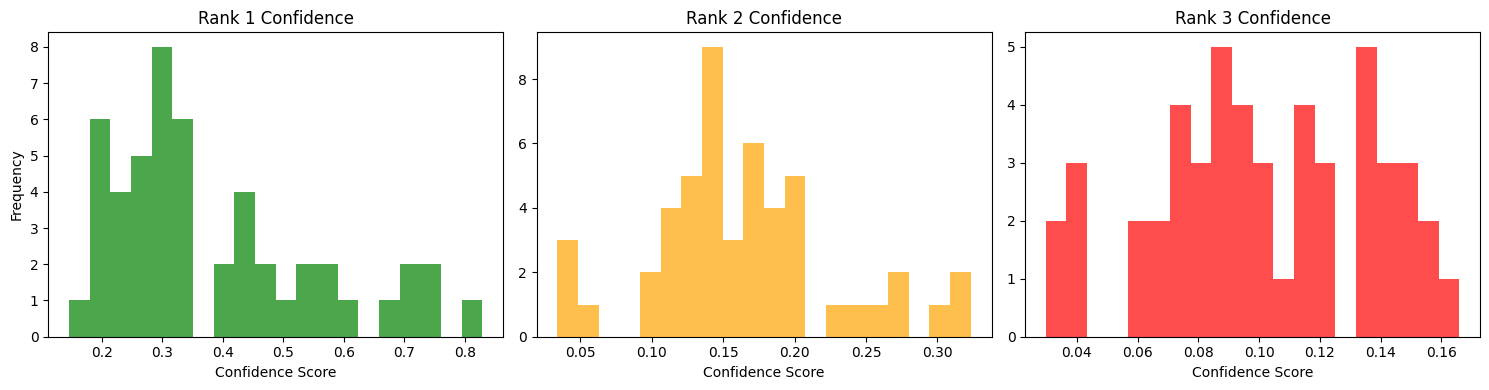


 Average top prediction confidence: 38.26%


In [11]:
# Analyze confidence scores
print("CONFIDENCE SCORE STATISTICS:")
print("="*50)
print("\nTop Tag (Rank 1) Confidence:")
print(df_zero_shot['confidence_1'].describe())

print("\nSecond Tag (Rank 2) Confidence:")
print(df_zero_shot['confidence_2'].describe())

print("\nThird Tag (Rank 3) Confidence:")
print(df_zero_shot['confidence_3'].describe())

# Visualize confidence distribution
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].hist(df_zero_shot['confidence_1'], bins=20, color='green', alpha=0.7)
axes[0].set_title('Rank 1 Confidence')
axes[0].set_xlabel('Confidence Score')
axes[0].set_ylabel('Frequency')

axes[1].hist(df_zero_shot['confidence_2'], bins=20, color='orange', alpha=0.7)
axes[1].set_title('Rank 2 Confidence')
axes[1].set_xlabel('Confidence Score')

axes[2].hist(df_zero_shot['confidence_3'], bins=20, color='red', alpha=0.7)
axes[2].set_title('Rank 3 Confidence')
axes[2].set_xlabel('Confidence Score')

plt.tight_layout()
plt.show()

print(f"\n Average top prediction confidence: {df_zero_shot['confidence_1'].mean()*100:.2f}%")

In [12]:
# Show detailed predictions for first 10 tickets
print("="*90)
print("SAMPLE PREDICTIONS (First 10 Tickets)")
print("="*90)

for idx in range(min(10, len(df_zero_shot))):
    row = df_zero_shot.iloc[idx]
    
    print(f"\n[{row['ticket_id']}]")
    print(f"Text: {row['ticket_text'][:80]}...")
    print(f"\nTop 3 Predictions:")
    print(f"  1. {row['tag_1']:<25} ({row['confidence_1']*100:>5.1f}%)")
    print(f"  2. {row['tag_2']:<25} ({row['confidence_2']*100:>5.1f}%)")
    print(f"  3. {row['tag_3']:<25} ({row['confidence_3']*100:>5.1f}%)")
    print("-" * 90)

SAMPLE PREDICTIONS (First 10 Tickets)

[TKT0001]
Text: I was charged twice for my last month's subscription. Can you refund me?...

Top 3 Predictions:
  1. Subscription              ( 34.8%)
  2. Refund Request            ( 30.7%)
  3. General Inquiry           (  8.6%)
------------------------------------------------------------------------------------------

[TKT0002]
Text: My credit card was charged but I didn't receive the service. Please help....

Top 3 Predictions:
  1. General Inquiry           ( 21.1%)
  2. Billing                   ( 15.4%)
  3. Technical Issue           ( 14.6%)
------------------------------------------------------------------------------------------

[TKT0003]
Text: Why is my bill higher than usual this month? I need an explanation....

Top 3 Predictions:
  1. Billing                   ( 42.3%)
  2. General Inquiry           ( 12.8%)
  3. Subscription              (  7.7%)
-------------------------------------------------------------------------------------

CONFIDENCE ANALYSIS:
High Confidence Predictions (≥70.0%): 5
Low Confidence Predictions (<40.0%): 31
Medium Confidence: 14

LOW CONFIDENCE CASES (Need Human Review):

TKT0001: I was charged twice for my last month's subscription. Can you refund m...
  Best guess: Subscription (34.8%)

TKT0002: My credit card was charged but I didn't receive the service. Please he...
  Best guess: General Inquiry (21.1%)

TKT0006: Double payment detected on my account. Need immediate refund....
  Best guess: Refund Request (38.9%)


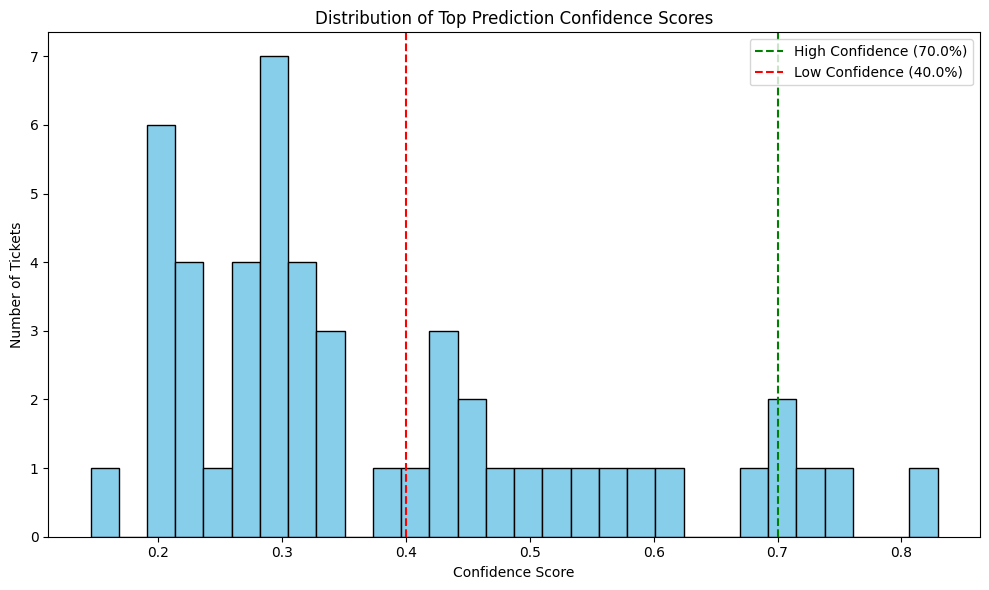

In [13]:
# Identify high and low confidence predictions
high_confidence_threshold = 0.7
low_confidence_threshold = 0.4

high_conf = df_zero_shot[df_zero_shot['confidence_1'] >= high_confidence_threshold]
low_conf = df_zero_shot[df_zero_shot['confidence_1'] < low_confidence_threshold]

print("CONFIDENCE ANALYSIS:")
print("="*70)
print(f"High Confidence Predictions (≥{high_confidence_threshold*100}%): {len(high_conf)}")
print(f"Low Confidence Predictions (<{low_confidence_threshold*100}%): {len(low_conf)}")
print(f"Medium Confidence: {len(df_zero_shot) - len(high_conf) - len(low_conf)}")

# Show examples of low confidence cases
if len(low_conf) > 0:
    print(f"\nLOW CONFIDENCE CASES (Need Human Review):")
    print("="*70)
    for idx, row in low_conf.head(3).iterrows():
        print(f"\n{row['ticket_id']}: {row['ticket_text'][:70]}...")
        print(f"  Best guess: {row['tag_1']} ({row['confidence_1']*100:.1f}%)")
else:
    print("\n No low confidence predictions! All tickets classified with high confidence.")

# Visualize confidence distribution
plt.figure(figsize=(10, 6))
plt.hist(df_zero_shot['confidence_1'], bins=30, color='skyblue', edgecolor='black')
plt.axvline(high_confidence_threshold, color='green', linestyle='--', label=f'High Confidence ({high_confidence_threshold*100}%)')
plt.axvline(low_confidence_threshold, color='red', linestyle='--', label=f'Low Confidence ({low_confidence_threshold*100}%)')
plt.xlabel('Confidence Score')
plt.ylabel('Number of Tickets')
plt.title('Distribution of Top Prediction Confidence Scores')
plt.legend()
plt.tight_layout()
plt.show()

In [14]:
# For demonstration: Create ground truth labels for evaluation
# In real scenario, you'd have actual labels from human annotators

# Let's manually label first 50 based on ticket content
ground_truth_labels = [
    # Billing Issues (tickets 0-9)
    'Billing', 'Billing', 'Billing', 'Billing', 'Billing',
    'Billing', 'Billing', 'Billing', 'Billing', 'Billing',
    
    # Technical Issues (tickets 10-19)
    'Technical Issue', 'Technical Issue', 'Technical Issue', 'Technical Issue', 'Technical Issue',
    'Technical Issue', 'Technical Issue', 'Technical Issue', 'Technical Issue', 'Technical Issue',
    
    # Account Issues (tickets 20-29)
    'Account Management', 'Account Management', 'Account Management', 'Account Management', 'Account Management',
    'Account Management', 'Account Management', 'Account Management', 'Account Management', 'Account Management',
    
    # Feature Requests (tickets 30-39)
    'Feature Request', 'Feature Request', 'Feature Request', 'Feature Request', 'Feature Request',
    'Feature Request', 'Feature Request', 'Feature Request', 'Feature Request', 'Feature Request',
    
    # General Inquiry (tickets 40-49)
    'General Inquiry', 'General Inquiry', 'General Inquiry', 'General Inquiry', 'General Inquiry',
    'General Inquiry', 'General Inquiry', 'General Inquiry', 'General Inquiry', 'General Inquiry'
]

# Add ground truth to dataframe
df_zero_shot['ground_truth'] = ground_truth_labels

print(" Ground truth labels added for evaluation")
print("\nLabel distribution:")
print(df_zero_shot['ground_truth'].value_counts())

 Ground truth labels added for evaluation

Label distribution:
ground_truth
Billing               10
Technical Issue       10
Account Management    10
Feature Request       10
General Inquiry       10
Name: count, dtype: int64


In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
predicted_labels = df_zero_shot['tag_1']
true_labels = df_zero_shot['ground_truth']

accuracy = accuracy_score(true_labels, predicted_labels)

print("="*70)
print("ZERO-SHOT PERFORMANCE EVALUATION")
print("="*70)
print(f"\nAccuracy: {accuracy*100:.2f}%")
print(f"Correct Predictions: {(predicted_labels == true_labels).sum()}/{len(true_labels)}")
print(f"Incorrect Predictions: {(predicted_labels != true_labels).sum()}/{len(true_labels)}")

# Detailed classification report
print("\n" + "="*70)
print("DETAILED CLASSIFICATION REPORT:")
print("="*70)
print(classification_report(true_labels, predicted_labels, zero_division=0))

# Show misclassified tickets
misclassified = df_zero_shot[predicted_labels != true_labels]
if len(misclassified) > 0:
    print(f"\nMISCLASSIFIED TICKETS ({len(misclassified)} total):")
    print("="*70)
    for idx, row in misclassified.head(5).iterrows():
        print(f"\n{row['ticket_id']}:")
        print(f"  Text: {row['ticket_text'][:60]}...")
        print(f"  Predicted: {row['tag_1']} ({row['confidence_1']*100:.1f}%)")
        print(f"  Actual: {row['ground_truth']}")
else:
    print("\n Perfect score! All tickets classified correctly!")

ZERO-SHOT PERFORMANCE EVALUATION

Accuracy: 58.00%
Correct Predictions: 29/50
Incorrect Predictions: 21/50

DETAILED CLASSIFICATION REPORT:
                    precision    recall  f1-score   support

Account Management       0.80      0.40      0.53        10
           Billing       0.80      0.40      0.53        10
        Bug Report       0.00      0.00      0.00         0
   Feature Request       0.75      0.90      0.82        10
   General Inquiry       0.71      0.50      0.59        10
       Integration       0.00      0.00      0.00         0
    Password Reset       0.00      0.00      0.00         0
    Refund Request       0.00      0.00      0.00         0
      Subscription       0.00      0.00      0.00         0
   Technical Issue       0.70      0.70      0.70        10

          accuracy                           0.58        50
         macro avg       0.38      0.29      0.32        50
      weighted avg       0.75      0.58      0.63        50


MISCLASSIFIED TI

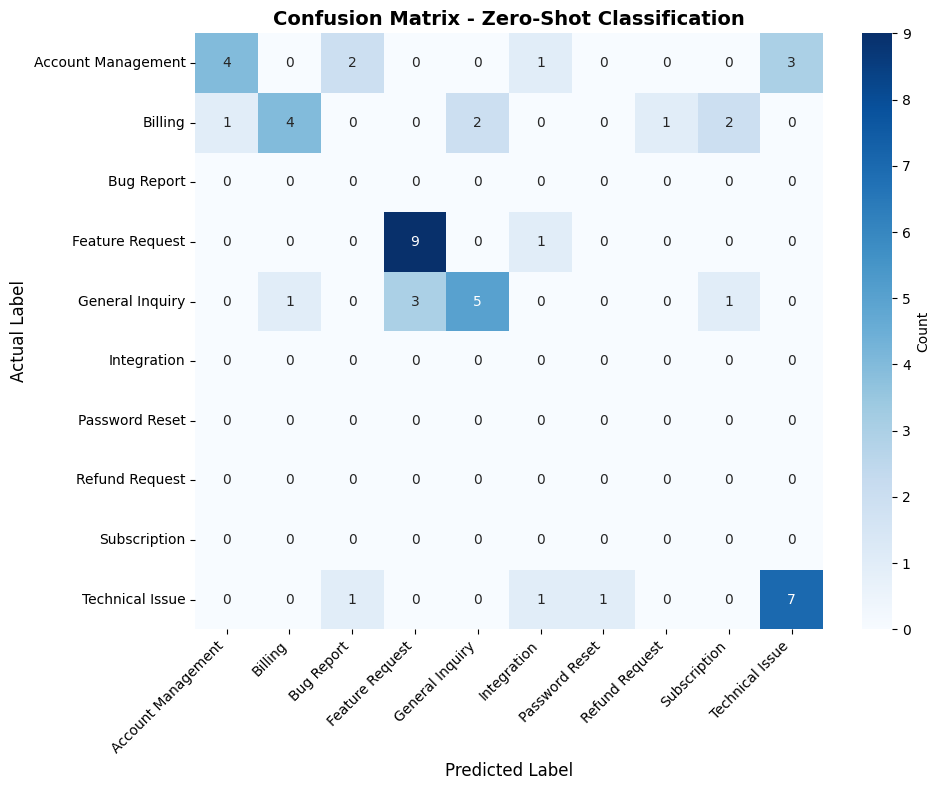

 Confusion matrix shows how predictions align with actual labels


In [16]:
# Create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=AVAILABLE_TAGS)

# Get only categories that appear in our data
unique_labels = sorted(list(set(true_labels) | set(predicted_labels)))

# Recompute confusion matrix for only used labels
cm = confusion_matrix(true_labels, predicted_labels, labels=unique_labels)

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=unique_labels,
            yticklabels=unique_labels,
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - Zero-Shot Classification', fontsize=14, fontweight='bold')
plt.ylabel('Actual Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print(" Confusion matrix shows how predictions align with actual labels")

In [17]:
# Save results to CSV
output_file = 'support_ticket_predictions.csv'
df_zero_shot.to_csv(output_file, index=False)

print(f" Results saved to '{output_file}'")
print(f"\nFile contains {len(df_zero_shot)} tickets with:")
print("  - Original ticket text")
print("  - Top 3 predicted tags")
print("  - Confidence scores")
print("  - Ground truth labels")

# Display summary statistics
print("\n" + "="*70)
print("FINAL SUMMARY")
print("="*70)
print(f"Total Tickets Processed: {len(df_zero_shot)}")
print(f"Unique Tags Used: {df_zero_shot['tag_1'].nunique()}")
print(f"Average Confidence: {df_zero_shot['confidence_1'].mean()*100:.2f}%")
print(f"Zero-Shot Accuracy: {accuracy*100:.2f}%")
print(f"\nOutput file: {output_file}")

 Results saved to 'support_ticket_predictions.csv'

File contains 50 tickets with:
  - Original ticket text
  - Top 3 predicted tags
  - Confidence scores
  - Ground truth labels

FINAL SUMMARY
Total Tickets Processed: 50
Unique Tags Used: 10
Average Confidence: 38.26%
Zero-Shot Accuracy: 58.00%

Output file: support_ticket_predictions.csv
